In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
'imports complete'

'imports complete'

<center><h1>The Relationship Between Smoking and Blood Pressure</h1></center>

<center><h3><i>By Eliot Martin</i></h3></center>

<center><h2>Framingham Data Set</h2><center>

The data I explore in this project was initially introduced to me in DSCI 102 for a project where we explored the connection between a patient's total cholesterol level and their likelihood of developing some form of heart disease. 

However, I realized quickly that in DSCI 102, I was using a data set that lacked some important columns of the original data set. Thus, I downloaded the full framingham data set from [this repository](https://raw.githubusercontent.com/GauravPadawe/Framingham-Heart-Study/master/framingham.csv)

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. However, the study provided a variety of useful insights into human health. My goal is to use the data from the study to learn about any connection that may exist between smoking and diastolic and systolic blood pressure.

These are the columns I selected from the data to study as well as the column's meanings:

- age: How old is the patient?
- currentSmoker: is the patient a current smoker?
- cigsPerDay: How many cigarettes does the patient smoke per day? (0 if not a smoker)
- sysBP: systolic blood pressure
- diaBP: diastolic blood pressure
- prevalentHyp: does the patient have hypertension?

In [61]:
df = pd.read_csv("framingham.csv")
df = df[["age", "currentSmoker", "cigsPerDay", "sysBP", "diaBP", "prevalentHyp"]]
df.head()

,age,currentSmoker,cigsPerDay,sysBP,diaBP,prevalentHyp
0,39,0,0.0,106.0,70.0,0
1,46,0,0.0,121.0,81.0,0
2,48,1,20.0,127.5,80.0,0
3,61,1,30.0,150.0,95.0,1
4,46,1,23.0,130.0,84.0,0


<center><h2>Smoking and Blood Pressure</h2></center>

I am curious as to whether smoking leads to higher blood pressure. There is already an established connection between smoking and higher blood pressure: https://www.verywellhealth.com/does-smoking-raise-blood-pressure-5086880.

Does the Framingham data I have support or refutes this claim? I do not have access to data about the entire poulation, so my goal is to use the sample to make inferences about the entire poulation. For the sake of the analysis, I am going to assume that the sample resembles the distribution of the population. 

Experiment:

Because I am assuming the distribution of our sample resembles the distribution of the population, I can use the sample to make inferences about the population. To do this, I will resample with replacement from our Framingham sample to create resamples the same size as the original sample. Why is this useful? Because it will allow us to estimate the mean of the population through constructing a confidence interval from the *resampled means* we gather. 

I am going to conduct a (slightly modified) unpaired samples t test to explore the connection between smoking and high blood pressure:

> **$H_0$**: Any difference between the average blood pressure of smokers and non-smokers is due purely to chance.

> **$H_1$**: Current smokers have higher average blood pressure than non-current smokers.

> **Test Statistic**: Assume: $\mu_1$ = Average Blood pressure of smokers in  our resample; $\mu_2$ = Average Blood pressure of non-smokers in  our original sample; $n$ = number of resamples.
$$\frac{(\mu_1-\mu_2) > 0}{n}$$

I will use a 1% cutoff for the p-value to ensure the legitimacy of my findings. This means that unless 99% or more of the resampled means of smokers have a *higher* blood pressure than the sample mean of non-smokers, we cannot reject the null hypothesis.

The first thing I want to do is separate the data into two groups: current smokers and non-smokers. Because there are null values in the data, I will use the function defined below to fill them with the column's median.

In [62]:
def fillMedian(col):
    return col.fillna(col.median())

In [63]:
pd.options.mode.chained_assignment = None

smoker = df[df["currentSmoker"]==1]  # this is our current smoker data
smoker['cigsPerDay'] = smoker['cigsPerDay'].transform(fillMedian)
display(smoker.head())

non_smoker = df[df["currentSmoker"]==0]  # this is our current non-smoker data
non_smoker['cigsPerDay'] = non_smoker['cigsPerDay'].transform(fillMedian)
display(non_smoker.head())

,age,currentSmoker,cigsPerDay,sysBP,diaBP,prevalentHyp
2,48,1,20.0,127.5,80.0,0
3,61,1,30.0,150.0,95.0,1
4,46,1,23.0,130.0,84.0,0
7,45,1,20.0,100.0,71.0,0
9,43,1,30.0,162.0,107.0,1


,age,currentSmoker,cigsPerDay,sysBP,diaBP,prevalentHyp
0,39,0,0.0,106.0,70.0,0
1,46,0,0.0,121.0,81.0,0
5,43,0,0.0,180.0,110.0,1
6,63,0,0.0,138.0,71.0,0
8,52,0,0.0,141.5,89.0,1


Although a little unorthadox, I want to begin by developing an understanding of the smoker and non-smoker data by comparing the mean blood pressures of each sample. Let's conduct a small unpaired samples t test to discover whether or not our samples have significantly different means. Obviously, if we find that our sample means are not significantly different, we will have an early indication in favor of our null hypothesis.

Let's assume our null and alternative hypotheses for this smaller t-test are as follows:

> **$H_0$**: $\mu_1 = \mu_2$

> **$H_1$**: $\mu_1 \neq \mu_2$

In Python, it is easy to conduct an unpaired samples t test. Below I have conducted two t-tests with a 1% cutoff value. A 'True' value generated by the test indicates significant difference in sample means whereas 'False' indicates insignificant difference. 

In [64]:
st.ttest_ind(smoker["diaBP"], non_smoker["diaBP"])[1] < 0.01 

True

In [65]:
st.ttest_ind(smoker["sysBP"], non_smoker["sysBP"])[1] < 0.01

True

It is evident above that the means of the samples are significantly different! Notice that the calculated p value in each test is less than 0.01 p value cutoff, meaning our findings *are significant* according to our previous definition of significance!

But which sample has higher blood pressure, smokers or non-smokers?

Let's calculate descriptive statistics for each sample and compare:

In [66]:
smoker_stats = smoker.describe()  # current smokers
smoker_stats

,age,currentSmoker,cigsPerDay,sysBP,diaBP,prevalentHyp
count,2095.000000,2095.0,2095.000000,2095.000000,2095.000000,2095.000000
mean,47.726969,1.0,18.378998,129.450358,81.597136,0.262053
std,7.984340,0.0,10.792545,20.480135,11.707025,0.439856
min,32.000000,1.0,1.000000,83.500000,48.000000,0.000000
25%,41.000000,1.0,10.000000,115.000000,73.000000,0.000000
50%,46.000000,1.0,20.000000,126.000000,80.000000,0.000000
75%,53.000000,1.0,20.000000,139.750000,88.000000,1.000000
max,69.000000,1.0,70.000000,230.000000,130.000000,1.000000


In [67]:
smoker_count = smoker_stats["age"]["count"]
smoker_diastolic = smoker_stats["diaBP"]
smoker_systolic = smoker_stats["sysBP"]
s_d5 = round(smoker_diastolic["min"], 2),round(smoker_diastolic["25%"],2),round(smoker_diastolic["50%"],2),round(smoker_diastolic["75%"], 2),round(smoker_diastolic["max"], 2)
s_s5 = round(smoker_systolic["min"], 2),round(smoker_systolic["25%"],2),round(smoker_systolic["50%"],2),round(smoker_systolic["75%"], 2),round(smoker_systolic["max"], 2)

print(f'The count of current smokers in our data set is: {round(smoker_count)}')
print(f'The average diastolic blood pressure of current smokers in our data set is: {round(smoker_diastolic["mean"], 2)}')
print(f'The 5-number summary for the diastolic blood pressure of current smokers in our data set is: {s_d5}')
print(f'The average systolic blood pressure of current smokers in our data set is: {round(smoker_systolic["mean"],2)}')
print(f'The 5-number summary for the systolic blood pressure of current smokers in our data set is: {s_s5}')

The count of current smokers in our data set is: 2095
The average diastolic blood pressure of current smokers in our data set is: 81.6
The 5-number summary for the diastolic blood pressure of current smokers in our data set is: (48.0, 73.0, 80.0, 88.0, 130.0)
The average systolic blood pressure of current smokers in our data set is: 129.45
The 5-number summary for the systolic blood pressure of current smokers in our data set is: (83.5, 115.0, 126.0, 139.75, 230.0)


From the above descriptive statistics, we can see a few key things:

- The sample is large at n = 2095
- The mean diastolic and systolic blood pressure for current smokers is 81.6 and 129.45, respectively.
- The half of smokers in the sample have a diastolic blood pressure between 73 and 88
- The half of smokers in the sample have a systolic blood pressure between 115 and 139.75

In [68]:
non_smoker_stats = non_smoker.describe()  # current non-smokers
non_smoker_stats

,age,currentSmoker,cigsPerDay,sysBP,diaBP,prevalentHyp
count,2145.000000,2145.0,2145.0,2145.000000,2145.000000,2145.000000
mean,51.390210,0.0,0.0,135.191142,84.168065,0.358042
std,8.741531,0.0,0.0,23.106095,11.972774,0.479536
min,33.000000,0.0,0.0,85.500000,51.000000,0.000000
25%,44.000000,0.0,0.0,119.000000,76.000000,0.000000
50%,52.000000,0.0,0.0,131.000000,83.000000,0.000000
75%,59.000000,0.0,0.0,147.000000,90.500000,1.000000
max,70.000000,0.0,0.0,295.000000,142.500000,1.000000


In [69]:
non_smoker_count = non_smoker_stats["age"]["count"]
non_smoker_diastolic = non_smoker_stats["diaBP"]
non_smoker_systolic = non_smoker_stats["sysBP"]
ns_d5 = round(non_smoker_diastolic["min"], 2),round(non_smoker_diastolic["25%"],2),round(non_smoker_diastolic["50%"],2),round(non_smoker_diastolic["75%"], 2),round(non_smoker_diastolic["max"], 2)
ns_s5 = round(non_smoker_systolic["min"], 2),round(non_smoker_systolic["25%"],2),round(non_smoker_systolic["50%"],2),round(non_smoker_systolic["75%"], 2),round(non_smoker_systolic["max"], 2)

print(f'The count of current non-smokers in our data set is: {round(non_smoker_count)}')
print(f'The average diastolic blood pressure of current non-smokers in our data set is: {round(non_smoker_diastolic["mean"], 2)}')
print(f'The 5-number summary for the diastolic blood pressure of non-smokers in our data set is: {ns_d5}')
print(f'The average systolic blood pressure of current non-smokers in our data set is: {round(non_smoker_systolic["mean"],2)}')
print(f'The 5-number summary for the systolic blood pressure of non-smokers in our data set is: {ns_s5}')

The count of current non-smokers in our data set is: 2145
The average diastolic blood pressure of current non-smokers in our data set is: 84.17
The 5-number summary for the diastolic blood pressure of non-smokers in our data set is: (51.0, 76.0, 83.0, 90.5, 142.5)
The average systolic blood pressure of current non-smokers in our data set is: 135.19
The 5-number summary for the systolic blood pressure of non-smokers in our data set is: (85.5, 119.0, 131.0, 147.0, 295.0)


From the above descriptive statistics, we can see a few key things:

- The sample is large at n = 2145
- The mean diastolic and systolic blood pressure for current non-smokers is 84.17 and 135.19, respectively.
- The half of non-smokers in the sample have a diastolic blood pressure between 76 and 90.5
- The half of non-smokers in the sample have a systolic blood pressure between 119 and 147

**Notice that the mean blood pressure of current smokers is lower than that of non-smokers.**

We can now conduct our main experiment. Remember, we said:
> **$H_0$**: Any difference between the average blood pressure of smokers and non-smokers is due purely to chance.

> **$H_1$**: Current smokers have higher average blood pressure than non-current smokers.

> **Test Statistic**: Assume: $\mu_1$ = Average Blood pressure of smokers in  our resample; $\mu_2$ = Average Blood pressure of non-smokers in  our original sample; $n$ = number of resamples.
$$\frac{(\mu_1-\mu_2) > 0}{n}$$

As it turns out, calculating this test statistic is not difficult: By repeatedlly resampling with replacement from our smokers dataframe, we can count the number of times we randomly encounter a resample mean as high or higher than the mean of the non current smokers. By doing this, we are effectively calculting the odds of randomly getting a current smoker mean equal to the sample mean of non-current smokers (could we randomly get a mean for smokers equivalent to the mean of non smokers).

Although the simple t-test we did before to check whether the means were equivalent answered a similar question, by tackling the problem as described above, we can be more specific (and make cool visualizations)!

In [70]:
n = len(smoker)  # generate resamples for smokers diastolic blood pressure
s = []

for i in range(n):
    s1 = smoker.sample(frac=1, replace=True)
    s.append(np.mean(s1["diaBP"]))

In [71]:
ci = (np.percentile(s, .5), np.percentile(s, 99.5))  # calculate a 99% confidence interval

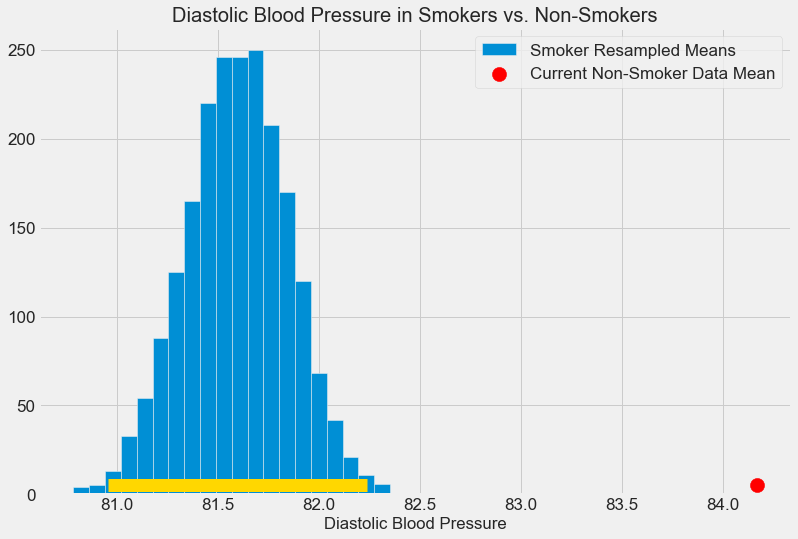

In [72]:
plt.figure(figsize=(12,8))
plt.hist(s, 20, label="Smoker Resampled Means")  # resampled means of smoker data
plt.scatter(non_smoker_diastolic["mean"], 5, color='red', s=200, zorder=3, label="Current Non-Smoker Data Mean")  # mean of non-smoker data
plt.plot([ci[0], ci[1]], [5,5], color="gold", lw=13.0)  # 95% confidence
plt.title("Diastolic Blood Pressure in Smokers vs. Non-Smokers")
plt.legend()
plt.xlabel("Diastolic Blood Pressure");

Notice that not a single resampled mean of current smoker's diastolic blood pressure was anywhere close to as high as the non-current smoker's sample mean for diastolic blood pressure. 

Our original test statistic was:

**$$\frac{(\mu_1-\mu_2) > 0}{n}$$**

Let's compute our p value!

In [73]:
sum((np.array(s) - non_smoker_diastolic["mean"]) > 0) / n

0.0

Clearly, we must keep our null hypothesis for diastolic blood pressure as none of the resamples had a mean equal or higher than the non-current smoker mean. This finding indicates that there is no significant increase in blood pressure from non-current smokers to current smokers. 

Although irrelevant to our ORIGINAL hypothesis test, the data begs the following question: do smokers have significantly *lower* blood pressure than non-current smokers in the data set?

In [74]:
sum((np.array(s) - non_smoker_diastolic["mean"]) < 0) / n

1.0

Yes, we seem to have significant data indicating that the diastolic blood pressure of current smokers is LOWER than that of non-current smokers.

Let's explore the same question as above with systolic blood pressure.

In [75]:
s2 = []

for i in range(n):
    sample = smoker.sample(frac=1, replace=True)
    s2.append(np.mean(sample["sysBP"]))

In [76]:
ci2 = (np.percentile(s2, .5), np.percentile(s2, 99.5))

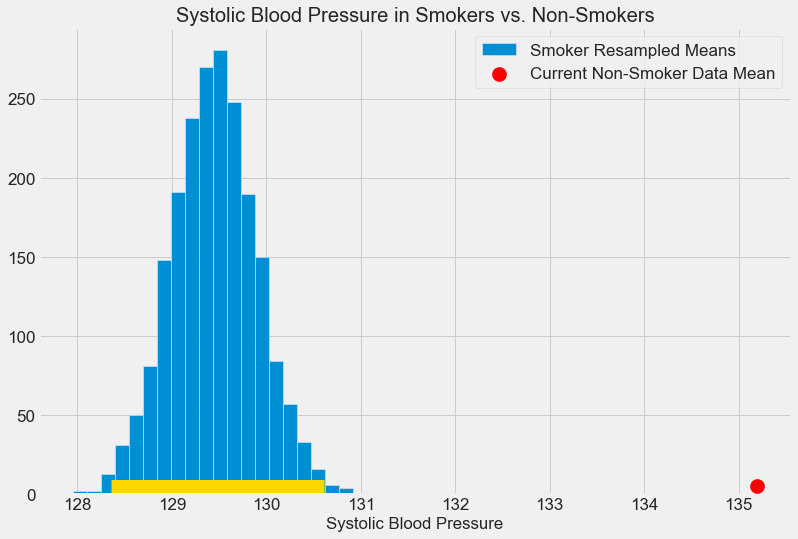

In [77]:
plt.figure(figsize=(12,8))
plt.hist(s2, 20, label="Smoker Resampled Means")
plt.scatter(non_smoker_systolic["mean"], 5, color='red', s=200, zorder=3, label="Current Non-Smoker Data Mean")
plt.plot([ci2[0], ci2[1]], [5,5], color="gold", lw=13.0)
plt.title("Systolic Blood Pressure in Smokers vs. Non-Smokers")
plt.legend()
plt.xlabel("Systolic Blood Pressure");

Our original test statistic was:

**$$\frac{(\mu_1-\mu_2) > 0}{n}$$**

Let's compute our p-value!

In [78]:
sum((np.array(s2) - non_smoker_systolic["mean"]) > 0) / n

0.0

Once again, we must keep our null hypothesis for systolic blood pressure as none of the resamples had a mean equal or higher than the current non-smoker mean. This finding indicates that there is no significant increase in systolic blood pressure from non-current smokers to current smokers. 

Is there a significant decrease?

In [79]:
sum((np.array(s2) - non_smoker_systolic["mean"]) < 0) / n

1.0

Yes, we seem to have significant data indicating that the systolic blood pressure of current smokers is also LOWER than that of non-current smokers.

Surprisingly, smokers have SIGNIFICANTLY lower blood pressure than non smokers in this data set. 

Does number of cigarettes smoked per day influence blood pressure? If smoking *really* lowers blood pressure, it is logical to think that the more cigarettes someone has per day, the lower their blood pressure will be. Let's make a linear regression line to check!

The following expression represents the line of best fit where $\bar{x}$, $\bar{y}$, $SD(x)$, $SD(y)$ are the means and standard deviations of $x$ and $y$, respectively, and $r$ is the correlation coefficient.

$$\hat{y_i} = \bar{y} + r \frac{SD(y)}{SD(x)} (x_i - \bar{x})$$

In [80]:
x_bar1 = np.mean(smoker["cigsPerDay"])
y_bar1 = np.mean(smoker["diaBP"])
std_x1 = np.std(smoker["cigsPerDay"])
std_y1 = np.std(smoker["diaBP"])
r1 = np.corrcoef(smoker["cigsPerDay"], smoker["diaBP"])[0][1]
print(f'Correlation coefficient for cigarettes per day vs diastolic blood pressure: {r1}')

Correlation coefficient for cigarettes per day vs diastolic blood pressure: 0.062358270527050605


Clearly, there is not really any correlation between the variables as r is very small. Nevertheless, the correlation IS positive and thus it may still be useful to create a regression line.

In [81]:
b_hat1 = (y_bar1+r1*(std_y1/std_x1)*(1-x_bar1)) - (y_bar1+r1*(std_y1/std_x1)*(0-x_bar1))  # rise over run
a_hat1 = y_bar1+r1*(std_y1/std_x1)*(0-x_bar1)
b_hat1

0.06764204738685464

We can see that our b_hat is positive meaning that the more cigarettes one has, the higher one's blood pressure should be.

In [82]:
regression1 = a_hat1 + b_hat1*smoker["cigsPerDay"]

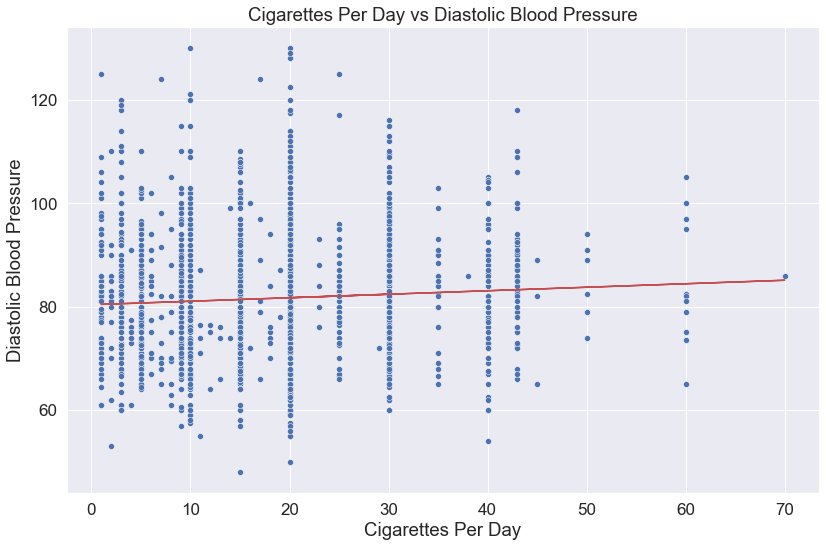

In [83]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.55)
sns.scatterplot(x='cigsPerDay', y='diaBP', data=smoker)
plt.plot(smoker["cigsPerDay"], regression1, color = 'r')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Diastolic Blood Pressure')
plt.title("Cigarettes Per Day vs Diastolic Blood Pressure");

In [84]:
a_hat1 + b_hat1*1

80.42158505808672

In [85]:
a_hat1 + b_hat1*70

85.08888632777969

Based on our (poorly correlated) regression line, it seems that smoking more cigarettes per day either does not influence diastolic blood pressure, or slightly increases diastolic blood pressure. 

Let's perform the same calculations on systolic blood pressure.

In [86]:
x_bar2 = np.mean(smoker["cigsPerDay"])
y_bar2 = np.mean(smoker["sysBP"])
std_x2 = np.std(smoker["cigsPerDay"])
std_y2 = np.std(smoker["sysBP"])
r2 = np.corrcoef(smoker["cigsPerDay"], smoker["sysBP"])[0][1]
r2

0.0294828411111481

Notice that once again, r is quite small

In [87]:
b_hat2 = (y_bar2+r2*(std_y2/std_x2)*(1-x_bar2)) - (y_bar2+r2*(std_y2/std_x2)*(0-x_bar2))  # rise over run
a_hat2 = y_bar2+r2*(std_y2/std_x2)*(0-x_bar2)
b_hat2

0.0559471909608078

In [88]:
regression2 = a_hat2 + b_hat2*smoker["cigsPerDay"]

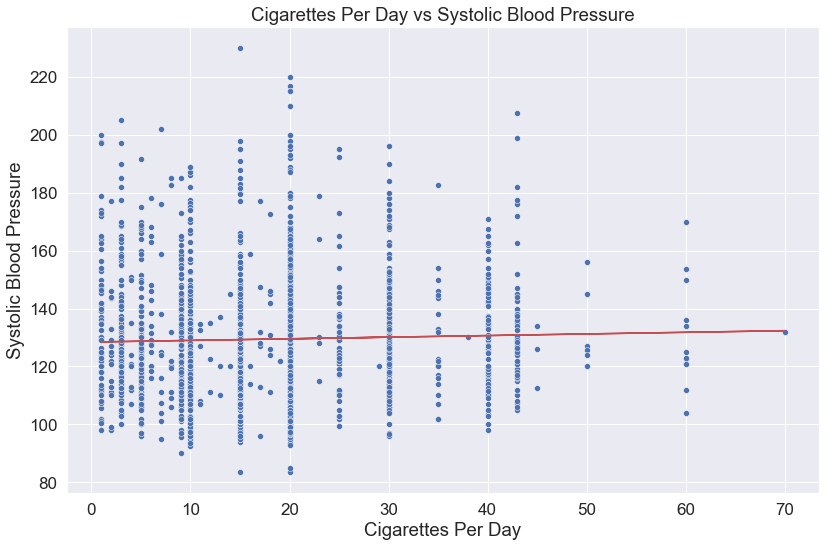

In [89]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.55)
sns.scatterplot(x='cigsPerDay', y='sysBP', data=smoker)
plt.plot(smoker["cigsPerDay"], regression2, color = 'r')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Systolic Blood Pressure')
plt.title("Cigarettes Per Day vs Systolic Blood Pressure");

In [90]:
a_hat2 + b_hat2*1

128.4780518970443

In [91]:
a_hat2 + b_hat2*70

132.33840807334005

Once again, it is clear that smoking more cigarettes per day either does not influence systolic blood pressure, or slightly increases systolic blood pressure.

Although it must be noted that despite this slight positive correlation between number of cigarettes smoked per day and blood pressure, the predicted value for a person that smokes 70 cigarettes a day is still less than the average blood pressure of a non-smoker.

<center><h2>Smoking and Hypertension</h2></center>

According to the [CDC](https://www.cdc.gov/bloodpressure/facts.htm), "In 2017, the American College of Cardiology and the American Heart Association published new guidelines for hypertension management and defined high hypertension as a blood pressure at or above 130/80 mmHg. Stage 2 hypertension is defined as a blood pressure at or above 140/90 mmHg." The numbers provided were in terms of systolic blood pressure.

Is there an association between smoking and hypertension? Let's use a chi-square test to explore this idea

> **$H_0$**: There is no association between smoking and hypertension.

> **$H_1$**: There is an association between smoking and hypertension.

To be sure, I will use a p cutoff value of 0.01.

The first step in performing a chi-square test for association is to make a contingency table. I have implemented this below:

In [92]:
contingencyTable = pd.crosstab(df.currentSmoker, df.prevalentHyp, margins=True)  # create contingency table
contingencyTable

prevalentHyp,0,1,All
currentSmoker,,,
0,1377,768,2145
1,1546,549,2095
All,2923,1317,4240


Next, we can use scipy to calculate our p value. If the p value calculated is smaller than 0.01, then there is an association between smoking and hypertension.

In [93]:
obs = np.array([contingencyTable.iloc[0][0:2].values,
                  contingencyTable.iloc[1][0:2].values])
p_value = round(st.chi2_contingency(obs)[1], 10)

In [94]:
p_value < 0.01

True

So we can conclude that there is a significant association between smoking and hypertension. The question is, which sample suffers more frequently from hypertension?

We can easily calculate this by dividing the number of smokers with hypertension by the total number of smokers to get a proportion. Then we can repeat this process for non-smokers.

In [95]:
non_current = contingencyTable.iloc[0][1] / contingencyTable.iloc[0]['All']
round(non_current,2)

0.36

In [96]:
current = contingencyTable.iloc[1][1] / contingencyTable.iloc[0]['All']
round(current,2)

0.26

Our non-smokers have a significantly higher proportion of people with hypertension than the proportion of smokers in the sample that had hypertension!

<center><h2>Age of Smokers vs Non-smokers</h2></center>

So are we ready to claim that smoking DOES NOT RAISE blood pressure? Not quite... Let's first check to see if the age of smokers in our data set is the same as non-smokers.

In [97]:
smoker_age = smoker_stats["age"]["mean"]  # remember our descriptive statistics?
print(f'The average age of a smoker in our data set is: {round(smoker_age,2)}')

The average age of a smoker in our data set is: 47.73


In [98]:
non_smoker_age = non_smoker_stats["age"]["mean"]
print(f'The average age of a non-smoker is: {round(non_smoker_age,2)}')

The average age of a non-smoker is: 51.39


So there is an important difference to be noted: **the smokers in our data set are generally younger than the non-smokers**. Could this influence our results?

Let's look at the relationship between age and blood pressure!

In [99]:
x_bar_age = np.mean(df["age"])
y_bar_age1 = np.mean(df["diaBP"])
y_bar_age2 = np.mean(df["sysBP"])
std_x_age = np.std(df["age"])
std_y_age_1 = np.std(df["diaBP"])
std_y_age_2 = np.std(df["sysBP"])
r_age_1 = np.corrcoef(smoker["age"], smoker["diaBP"])[0][1]
r_age_2 = np.corrcoef(smoker["age"], smoker["sysBP"])[0][1]
r_age_1, r_age_2

(0.20025865461726125, 0.37133262508153575)

We can already see that there is a positive correlation between age and blood pressure. From this we can see that as age increases, both systolic and diastolic blood pressure increase! 

Now let's create regression lines to help visualize this trend.

In [100]:
# b_hat and a_hat for age vs diastolic bp
b_hat_age1 = (y_bar_age1+r_age_1*(std_y_age_1/std_x_age)*(1-x_bar_age)) - (y_bar_age1+r_age_1*(std_y_age_1/std_x_age)*(0-x_bar_age)) 
a_hat_age1 = y_bar_age1+r_age_1*(std_y_age_1/std_x_age)*(0-x_bar_age)

In [101]:
# b_hat and a_hat for age vs sysstolic bp
b_hat_age2 = (y_bar_age2+r_age_2*(std_y_age_2/std_x_age)*(1-x_bar_age)) - (y_bar_age2+r_age_2*(std_y_age_2/std_x_age)*(0-x_bar_age)) 
a_hat_age2 = y_bar_age2+r_age_2*(std_y_age_2/std_x_age)*(0-x_bar_age)

In [102]:
# create both regressions
regression_age1 = a_hat_age1 + b_hat_age1*df["age"]
regression_age2 = a_hat_age2 + b_hat_age2*df["age"]

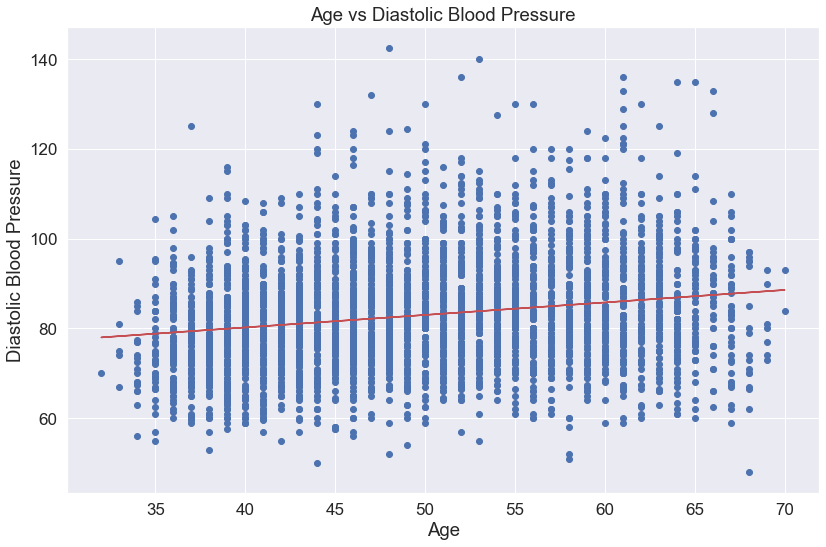

In [103]:
# plot age vs diastolic bp
plt.scatter(x='age', y='diaBP', data=df)
plt.plot(df["age"], regression_age1, color="r")
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.title("Age vs Diastolic Blood Pressure");

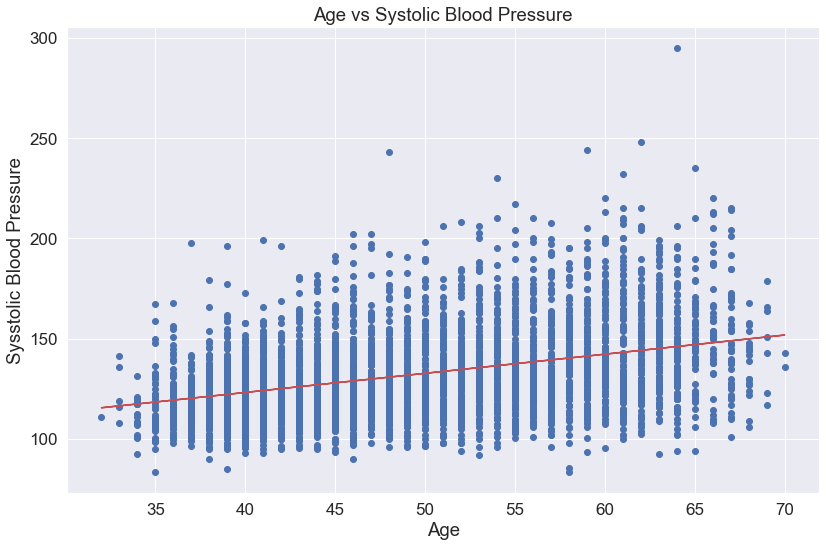

In [104]:
# plot age vs systolic bp
plt.scatter(x='age', y='sysBP', data=df)
plt.plot(df["age"], regression_age2, color="r")
plt.xlabel('Age')
plt.ylabel('Sysstolic Blood Pressure')
plt.title("Age vs Systolic Blood Pressure");

We know that the average age of smokers is lower than the average age of non smokers in our data set. We now also can see that as age increases, so does both diastolic blood pressure and systolic blood pressure. Because the average age of smokers in our data set is lower than the average age of non-smokers, could it be that smoking increases blood pressure when age is accounted for? Could we reject our original null hypothesis afterall?

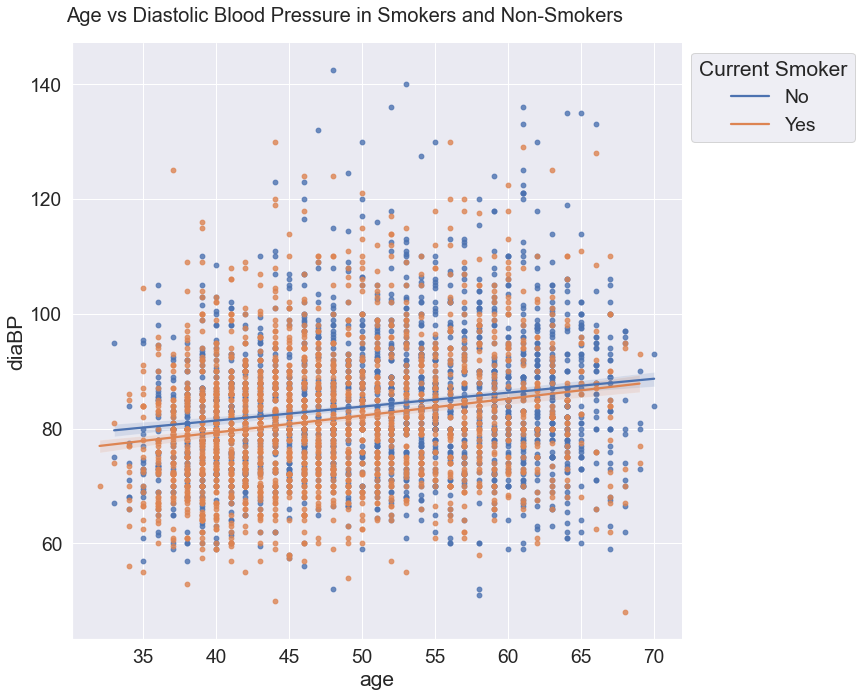

In [105]:
sns.set(font_scale=1.75)
ax = sns.lmplot(x="age", y="diaBP", hue="currentSmoker", data=df, scatter_kws={"s": 23}, height=10, legend=False)
ax.figure.suptitle("Age vs Diastolic Blood Pressure in Smokers and Non-Smokers", fontsize=20)
ax.fig.subplots_adjust(top=0.93)
plt.legend(title='Current Smoker', labels=['No', 'Yes'], bbox_to_anchor=(1., 1.00))
plt.show(ax);

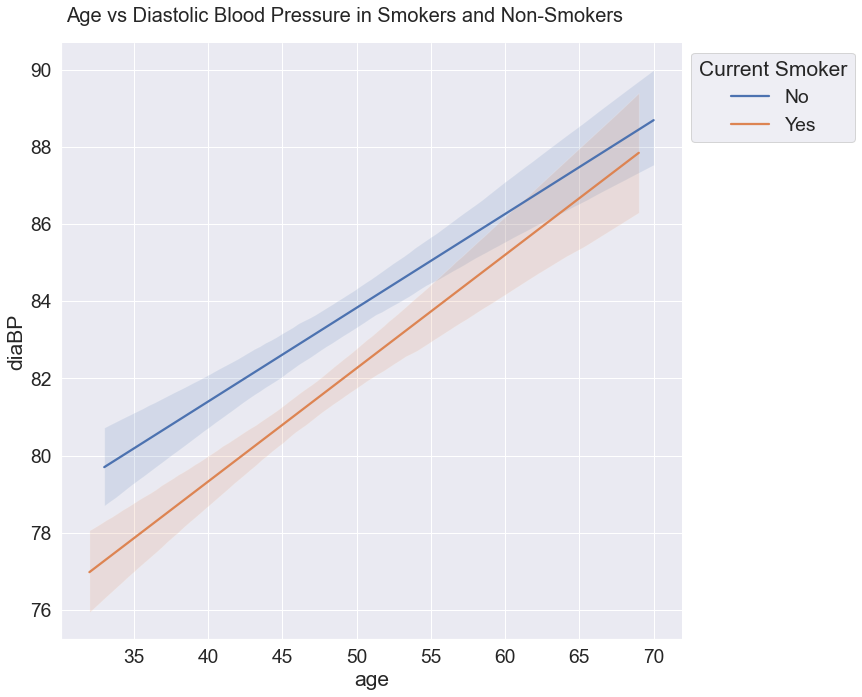

In [106]:
sns.set(font_scale=1.75)
ax = sns.lmplot(x="age", y="diaBP", hue="currentSmoker", data=df, scatter_kws={"s": 23}, height=10, scatter=False, legend=False)
ax.figure.suptitle("Age vs Diastolic Blood Pressure in Smokers and Non-Smokers", fontsize=20)
ax.fig.subplots_adjust(top=0.93)
plt.legend(title='Current Smoker', labels=['No', 'Yes'], bbox_to_anchor=(1., 1.00))
plt.show(ax);

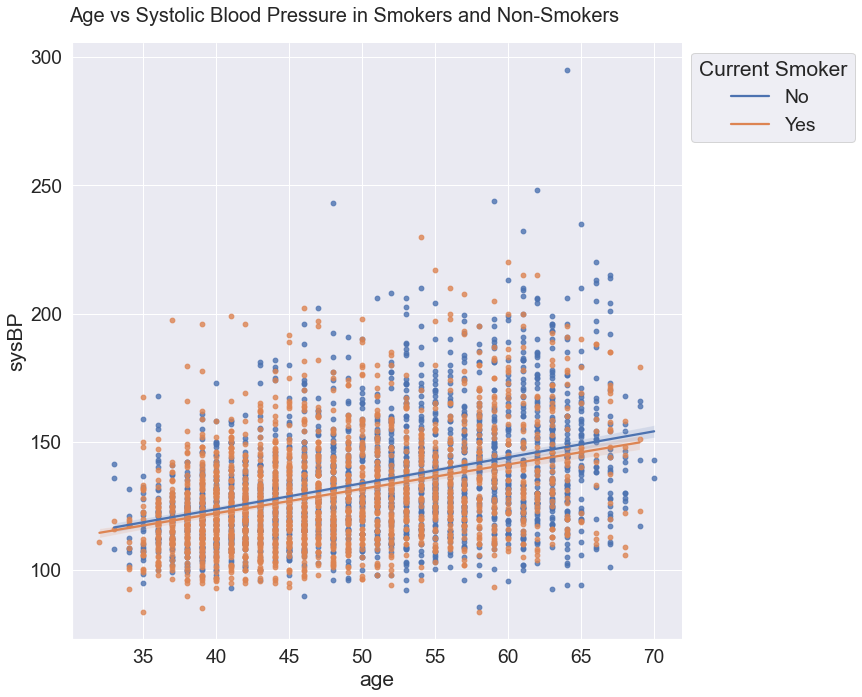

In [107]:
sns.set(font_scale=1.75)
ax = sns.lmplot(x="age", y="sysBP", hue="currentSmoker", data=df, scatter_kws={"s": 23}, height=10, legend=False)
ax.figure.suptitle("Age vs Systolic Blood Pressure in Smokers and Non-Smokers", fontsize=20)
ax.fig.subplots_adjust(top=0.93)
plt.legend(title='Current Smoker', labels=['No', 'Yes'], bbox_to_anchor=(1., 1.00))
plt.show(ax);

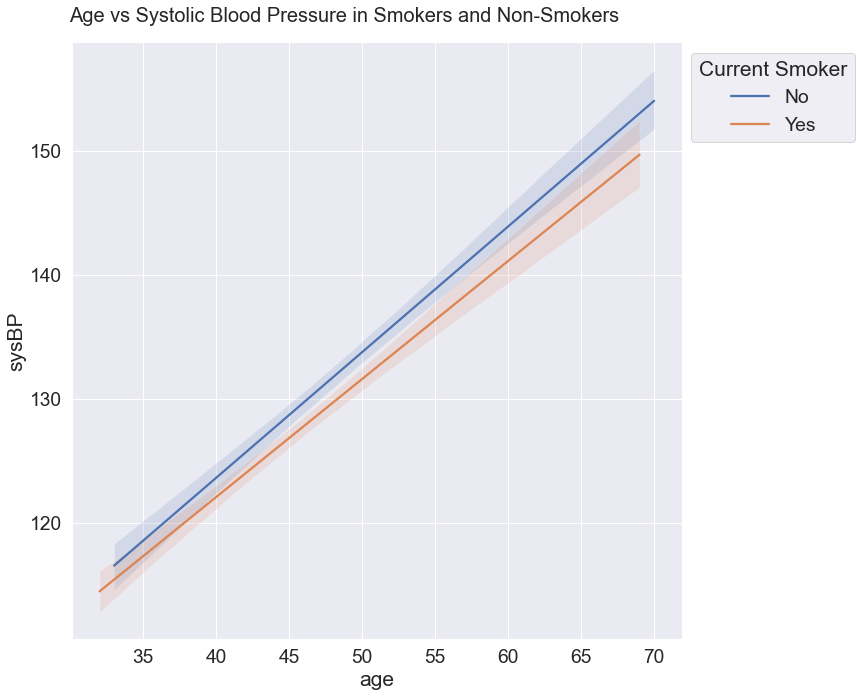

In [108]:
sns.set(font_scale=1.75)
ax = sns.lmplot(x="age", y="sysBP", hue="currentSmoker", data=df, scatter_kws={"s": 23}, height=10, scatter=False, legend=False)
ax.figure.suptitle("Age vs Systolic Blood Pressure in Smokers and Non-Smokers", fontsize=20)
ax.fig.subplots_adjust(top=0.93)
plt.legend(title='Current Smoker', labels=['No', 'Yes'], bbox_to_anchor=(1., 1.00))
plt.show(ax);

Although the difference is smaller, notice that **current smokers STILL have lower blood pressure than non-current smokers** even with respect to age!

<center><h2>Findings:</h2></center>

**Reject our null hypothesis that smoking does not lead to higher blood pressure?**

No. Even when we accounted for the difference in age between current smokers and current non-smokers, current smokers did **NOT** have higher blood pressure than current non-smokers in this data set! Therefore, we have insufficient evidence to reject this null hypothesis.

**Does smoking *LOWER* blood pressure?**

No; although the t-test and chi-square test found that smokers in the sample had lower blood pressure than non-smokers and less frequently experienced hypertension, there is evidence that makes this claim hard to make:

- There was no correlation/slight positive correlation between cigarettes smoked per day and blood pressure. If smoking lowered blood pressure, it would make more sense for this number to be negative.
- I did not conduct any tests with respect to age. We found at the end that this was a factor that had not been controlled for in our tests.

**Do smokers have higher rates of hypertension than non-smokers?**

This is tricky because I did not account for age. However, through the chi-square test that found smokers had lower rates of hypertension than non-smokers AND that even with respect to age, non-smokers had higher blood pressure than smokers, I am comfortable saying this:

- Based on my findings, it appears that smoking does not result in higher risk of hypertension.

**Are these findings reasonable?**

According to the [National Library of Medicine](https://pubmed.ncbi.nlm.nih.gov/9162447/), "It is a paradox that while smoking acutely increases blood pressure, a slightly lower blood pressure level has been found among smokers than nonsmokers in larger epidemiological studies." [OnHealth.com](https://www.onhealth.com/content/1/alcohol_coffee_smoking_and_high_blood_pressure) claims the reason for this increase in blood pressure "is that the nicotine in the cigarettes causes a decrease in appetite, which leads to weight loss. This, in turn, lowers the blood pressure." The findings in this analysis aligns with these views.